In [115]:
import tensorflow as tf
from tensorflow.keras import layers

# Set seed for reproducibility
seed = 123

# Define the directory paths for the training and validation datasets
train_dir = './training_set/training_set'
validation_dir = './test_set/test_set'

# Use the image_dataset_from_directory function to create training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels="inferred",
    label_mode="categorical",  # Use "categorical" for categorical labels
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=seed
)

# Use the image_dataset_from_directory function to create validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validation_dir,
    labels="inferred",
    label_mode="categorical",  # Use "categorical" for categorical labels
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=seed
)

Found 8532 files belonging to 3 classes.
Using 6826 files for training.
Found 2151 files belonging to 3 classes.
Using 430 files for validation.


In [117]:
# Normalizing the data 
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [119]:
import os

# Get the directory path from the DirectoryIterator object
dataset_path = './training_set/training_set'

# Count the number of subdirectories (classes)
num_classes = len([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

print("Number of classes:", num_classes)

Number of classes: 4


In [214]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [216]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))



In [218]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,323 (56.64 MB)

 Trainable params: 14,847,875 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [220]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [222]:
model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 805s 4s/step - accuracy: 0.5473 - loss: 5.4679 - val_accuracy: 0.4837 - val_loss: 1.6532
Epoch 2/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 1781s 8s/step - accuracy: 0.5718 - loss: 1.0458 - val_accuracy: 0.5163 - val_loss: 2.1996
Epoch 3/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 787s 4s/step - accuracy: 0.6698 - loss: 0.6718 - val_accuracy: 0.6349 - val_loss: 0.6659
Epoch 4/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 797s 4s/step - accuracy: 0.6975 - loss: 0.6268 - val_accuracy: 0.5000 - val_loss: 5.2758
Epoch 5/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 794s 4s/step - accuracy: 0.6705 - loss: 0.6962 - val_accuracy: 0.6605 - val_loss: 0.7270
Epoch 6/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 1452s 7s/step - accuracy: 0.7547 - loss: 0.5419 - val_accuracy: 0.6977 - val_loss: 0.5754
Epoch 7/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 1838s 9s/step - accuracy: 0.7768 - loss: 0.4734 - val_accuracy: 0.6442 - val_loss: 1.0838
Epoch 8/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 44894s 211s/step - accuracy: 0.8639 - loss: 0.3114 - v

In [139]:
import cv2
import matplotlib.pyplot as plt

In [10]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [274]:
test_img=cv2.imread('cat.jpg')

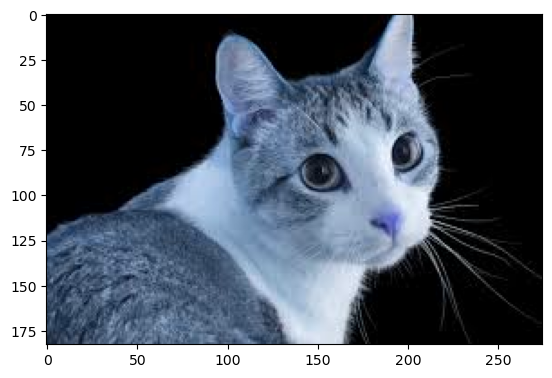

In [276]:
plt.imshow(test_img)

In [278]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [280]:
cat=model.predict(test_input)[0][0]
dog=model.predict(test_input)[0][1]
human=model.predict(test_input)[0][2]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


In [282]:
if dog > cat and dog > human:
    print("Dog")
elif cat > dog and cat > human:
    print("Cat")
else:
    print("Human")
    

Cat


In [113]:
import pickle


with open('cnn_model1.pkl', 'wb') as file:
    pickle.dump(model, file)
